In [1]:
%load_ext autoreload
%autoreload 2
from src.core.timeseries_evaluation import get_quantile_scores, get_crps_scores, get_empirical_coverage_rates, get_crps_by_period, plot_crps, load_predictions, plot_crps_across_lead_times
import pandas as pd

/Users/louisskowronek/Documents/thesis/master-thesis/.venv_new/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# todo: 
# - fine tuning increase number of evaluation steps. Set it to 0.1 -> 10% 
# - reduce number of early stopping epochs from 5 to e.g. 3
# - validation dataset is set to 3 years. also used for calibration. -> what is the required number of datapoints for good calibration?
# - maybe only choose a subset of the 3 years data for calibration? do calibration less often
# ask for input on Arkussinus hyperbolicus (inverse hyperbolic sine function)
# Schwieirigkeiten: - File size ist groß. 
#                   - Evtl. nur ein subset der predictions nehmen für validierung
#                   - chronos t5 implementiert aber noch nicht getestet.
#                   - naive rolling benchmark offset
# bias correction: update offset not only once on a calibration dataset but continously update it

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Evaluation Results for energy consumption

In [24]:
results = load_predictions(prediction_dirs="./results/stromverbrauch/pipeline/")

2025-05-22 12:21:21,797 - INFO - timeseries_evaluation.py - Loading predictions by searching in provided directories...
2025-05-22 12:21:21,805 - INFO - timeseries_evaluation.py - Common path identified: results/stromverbrauch/pipeline
2025-05-22 12:21:21,882 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/stromverbrauch/pipeline/chronos-bolt-zero-shot-sampling/backtest/Chronos/predictions.joblib` as key: chronos-bolt-zero-shot-sampling_Chronos
2025-05-22 12:21:22,020 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/stromverbrauch/pipeline/seasonal_rolling/backtest/PostprocessorQR/predictions.joblib` as key: seasonal_rolling_PostprocessorQR
2025-05-22 12:21:22,152 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/stromverbrauch/pipeline/seasonal_rolling/backtest/PostprocessorEQC/predictions.joblib` as key: seasonal_rolling_PostprocessorEQC
2025-05-22 12:21:22,279 - INFO - timeseries_evaluation.py - Loaded prediction file: `res

In [5]:
crps_results = get_crps_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

In [6]:
crps_results

,chronos-bolt-finetuned-full_PostprocessorQR,chronos-bolt-finetuned-full_PostprocessorMLE,chronos-bolt-finetuned-full_PostprocessorEQC,chronos-bolt-finetuned-lora_PostprocessorQR,chronos-bolt-finetuned-lora_PostprocessorMLE,chronos-bolt-finetuned-lora_PostprocessorEQC,chronos-bolt-finetuned-full_Chronos,chronos-bolt-finetuned-last-layer_PostprocessorQR,chronos-bolt-finetuned-last-layer_PostprocessorMLE,chronos-bolt-finetuned-last-layer_PostprocessorEQC,chronos-bolt-zero-shot_PostprocessorQR,chronos-bolt-zero-shot_PostprocessorMLE,chronos-bolt-zero-shot_PostprocessorEQC,chronos-bolt-finetuned-lora_Chronos,chronos-bolt-finetuned-last-layer_Chronos,chronos-bolt-zero-shot-sampling_Chronos,chronos-bolt-zero-shot_Chronos,seasonal_rolling_PostprocessorQR,seasonal_rolling_PostprocessorMLE,seasonal_rolling_PostprocessorEQC,seasonal_rolling_RollingSeasonalQuantilePredictor,naive_rolling_PostprocessorQR,naive_rolling_PostprocessorMLE,naive_rolling_PostprocessorEQC,naive_rolling_RollingQuantilePredictor
lead times,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.903014,0.903777,0.908089,0.934985,0.931161,0.952286,0.937523,0.916618,0.913343,0.931537,0.938517,0.934451,0.974081,0.976531,0.942171,1.000000,1.0,5.372143,5.395263,5.407391,5.502399,7.288592,7.468611,7.304503,7.335116
2,0.904534,0.904675,0.907731,0.960010,0.957575,0.964152,0.915125,0.961774,0.960096,0.969611,0.981943,0.981065,0.993808,0.969750,0.970993,1.000000,1.0,3.715056,3.731011,3.739428,3.805125,5.120013,5.229045,5.134598,5.159837
3,0.909843,0.908705,0.911820,0.965512,0.964745,0.968599,0.914241,0.970746,0.973975,0.976365,0.988392,0.988480,0.996306,0.970380,0.977299,1.000000,1.0,2.906980,2.919495,2.926087,2.977499,4.060509,4.137792,4.074401,4.096824
4,0.913316,0.912658,0.914316,0.964446,0.964981,0.967260,0.915677,0.971781,0.971955,0.976411,0.989024,0.989320,0.995375,0.969411,0.977797,1.000000,1.0,2.451017,2.461550,2.467130,2.510462,3.461885,3.522619,3.475963,3.496943
5,0.916208,0.915788,0.916759,0.964053,0.964475,0.966559,0.918507,0.972655,0.974118,0.976613,0.989092,0.989663,0.994140,0.970102,0.978750,1.000000,1.0,2.170172,2.179537,2.184486,2.222847,3.093273,3.144203,3.107864,3.127919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.929528,0.932827,0.932008,0.954968,0.958307,0.961697,0.951425,0.965274,0.971075,0.969764,0.980936,0.985254,0.984279,0.984297,0.989416,1.007716,1.0,1.054484,1.056956,1.064782,1.087795,1.664456,1.673970,1.678060,1.704124
190,0.929591,0.932889,0.932173,0.955370,0.958587,0.962026,0.951641,0.965133,0.970939,0.969747,0.981294,0.985375,0.984288,0.983648,0.989019,1.008668,1.0,1.052822,1.055297,1.063106,1.086086,1.662038,1.672491,1.675037,1.701094
191,0.929231,0.932198,0.931935,0.954780,0.957878,0.960994,0.951181,0.964587,0.970041,0.969370,0.981481,0.985299,0.984166,0.981895,0.988194,1.008193,1.0,1.050882,1.053361,1.061158,1.084099,1.661874,1.672297,1.674778,1.701057


In [ ]:
# make a bar chart with the mean crps results

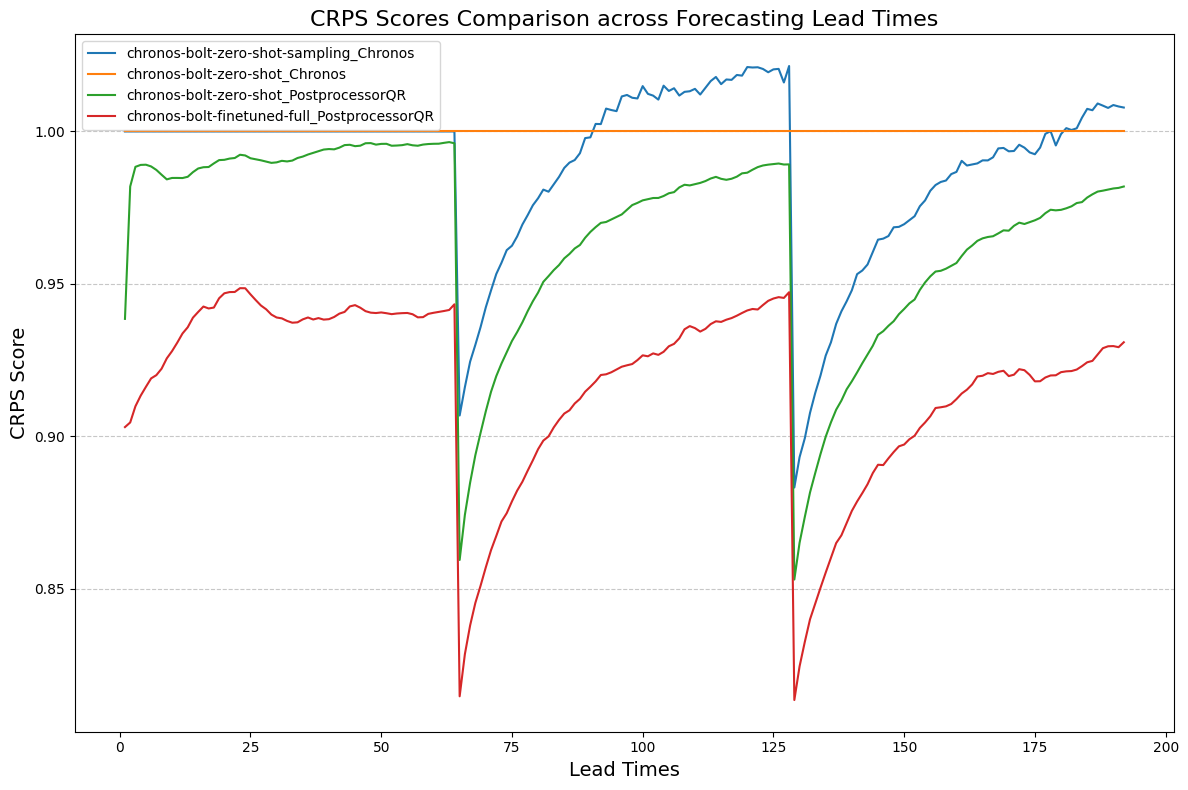

In [11]:
plot_crps_across_lead_times(results, 
                            selected_keys=["chronos-bolt-zero-shot_Chronos", 
                                            "chronos-bolt-zero-shot_PostprocessorQR",
                                            "chronos-bolt-zero-shot-sampling_Chronos", 
                                            "chronos-bolt-finetuned-full_PostprocessorQR",
                                            # "seasonal_rolling_RollingSeasonalQuantilePredictor"
                                            ],
                            reference_predictions="chronos-bolt-zero-shot_Chronos")

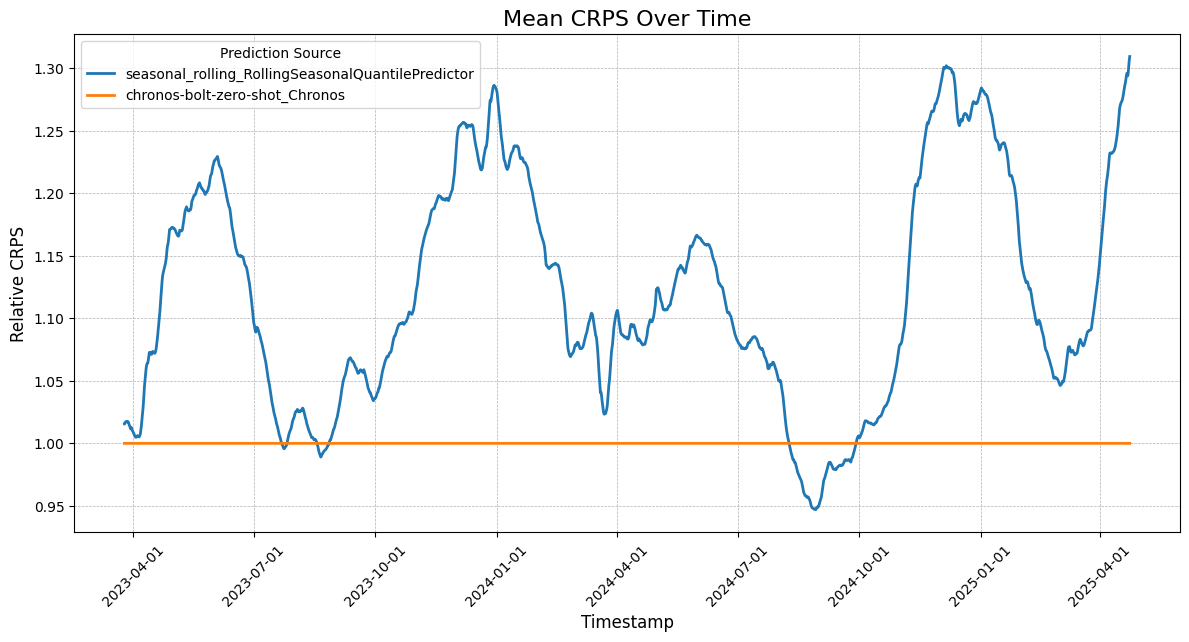

In [13]:
plot_crps(results, selected_keys = ["seasonal_rolling_RollingSeasonalQuantilePredictor",
                                    "chronos-bolt-zero-shot_Chronos"], rolling_window_eval=2000, reference_predictions="chronos-bolt-zero-shot_Chronos")

In [14]:
quantile_scores = get_quantile_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

In [15]:
quantile_scores

,chronos-bolt-zero-shot-sampling_Chronos,seasonal_rolling_PostprocessorQR,seasonal_rolling_PostprocessorEQC,seasonal_rolling_PostprocessorMLE,seasonal_rolling_RollingSeasonalQuantilePredictor,chronos-bolt-finetuned-lora_Chronos,chronos-bolt-finetuned-lora_PostprocessorQR,chronos-bolt-finetuned-lora_PostprocessorEQC,chronos-bolt-finetuned-lora_PostprocessorMLE,chronos-bolt-zero-shot_Chronos,chronos-bolt-zero-shot_PostprocessorQR,chronos-bolt-zero-shot_PostprocessorEQC,chronos-bolt-zero-shot_PostprocessorMLE,naive_rolling_PostprocessorQR,naive_rolling_PostprocessorEQC,naive_rolling_PostprocessorMLE,naive_rolling_RollingQuantilePredictor,chronos-bolt-finetuned-full_Chronos,chronos-bolt-finetuned-full_PostprocessorQR,chronos-bolt-finetuned-full_PostprocessorEQC,chronos-bolt-finetuned-full_PostprocessorMLE,chronos-bolt-finetuned-last-layer_Chronos,chronos-bolt-finetuned-last-layer_PostprocessorQR,chronos-bolt-finetuned-last-layer_PostprocessorEQC,chronos-bolt-finetuned-last-layer_PostprocessorMLE
quantile,,,,,,,,,,,,,,,,,,,,,,,,,
0.1,0.932594,1.044184,1.049348,1.043575,1.140640,1.005853,0.874796,0.895116,0.895100,1.0,0.892790,0.900217,0.910874,1.424020,1.410942,1.491066,1.482757,0.951828,0.846275,0.858863,0.864389,0.982940,0.872220,0.889400,0.891516
0.2,0.977359,1.108976,1.111603,1.101713,1.144001,0.996125,0.938536,0.946953,0.944367,1.0,0.958431,0.958546,0.964090,1.613368,1.590617,1.641797,1.612280,0.957760,0.912124,0.916956,0.918893,0.988288,0.939311,0.945280,0.946949
0.3,1.002944,1.130750,1.134885,1.122333,1.150136,0.987448,0.965533,0.969458,0.963860,1.0,0.987507,0.986081,0.986445,1.706931,1.695284,1.712432,1.703304,0.957278,0.940353,0.941144,0.940250,0.989368,0.970660,0.972702,0.971170
0.4,1.014162,1.140081,1.148450,1.130272,1.154455,0.979976,0.973116,0.976693,0.969458,1.0,0.997698,0.997479,0.993953,1.759578,1.770788,1.741768,1.775551,0.953979,0.949222,0.949960,0.947100,0.988015,0.983246,0.985035,0.980903
0.5,1.015065,1.142030,1.151017,1.133443,1.152259,0.973924,0.968308,0.973317,0.965958,1.0,0.995583,0.997957,0.991971,1.771926,1.809229,1.743449,1.810996,0.949046,0.945587,0.947077,0.944179,0.985553,0.982556,0.985381,0.981158
0.6,1.011038,1.136769,1.146494,1.133281,1.145558,0.969271,0.955870,0.962352,0.955349,1.0,0.984847,0.990106,0.983110,1.755484,1.800035,1.725559,1.804676,0.943079,0.933391,0.935542,0.932775,0.983247,0.972851,0.976755,0.973212
0.7,0.994316,1.113998,1.124159,1.123976,1.127089,0.966461,0.935565,0.944116,0.937837,1.0,0.965394,0.973985,0.967619,1.695408,1.734388,1.690933,1.748026,0.937030,0.912553,0.915667,0.912986,0.981944,0.954591,0.959170,0.957308
0.8,0.963727,1.064584,1.076148,1.101545,1.094330,0.966438,0.904031,0.916101,0.911396,1.0,0.932943,0.945547,0.941941,1.589124,1.633162,1.636453,1.661366,0.932094,0.881289,0.885924,0.884781,0.983415,0.922133,0.928076,0.929429
0.9,0.906454,0.969693,0.981986,1.048706,1.057329,0.973246,0.848368,0.865369,0.867516,1.0,0.875726,0.891497,0.899515,1.422772,1.475038,1.547379,1.537960,0.935179,0.825769,0.833730,0.839102,0.995080,0.862937,0.869491,0.880943


In [16]:
coverage_rates = get_empirical_coverage_rates(results)

In [17]:
coverage_rates

,chronos-bolt-zero-shot-sampling_Chronos,seasonal_rolling_PostprocessorQR,seasonal_rolling_PostprocessorEQC,seasonal_rolling_PostprocessorMLE,seasonal_rolling_RollingSeasonalQuantilePredictor,chronos-bolt-finetuned-lora_Chronos,chronos-bolt-finetuned-lora_PostprocessorQR,chronos-bolt-finetuned-lora_PostprocessorEQC,chronos-bolt-finetuned-lora_PostprocessorMLE,chronos-bolt-zero-shot_Chronos,chronos-bolt-zero-shot_PostprocessorQR,chronos-bolt-zero-shot_PostprocessorEQC,chronos-bolt-zero-shot_PostprocessorMLE,naive_rolling_PostprocessorQR,naive_rolling_PostprocessorEQC,naive_rolling_PostprocessorMLE,naive_rolling_RollingQuantilePredictor,chronos-bolt-finetuned-full_Chronos,chronos-bolt-finetuned-full_PostprocessorQR,chronos-bolt-finetuned-full_PostprocessorEQC,chronos-bolt-finetuned-full_PostprocessorMLE,chronos-bolt-finetuned-last-layer_Chronos,chronos-bolt-finetuned-last-layer_PostprocessorQR,chronos-bolt-finetuned-last-layer_PostprocessorEQC,chronos-bolt-finetuned-last-layer_PostprocessorMLE
quantile,,,,,,,,,,,,,,,,,,,,,,,,,
0.1,0.136936,0.136649,0.108869,0.127774,0.197802,0.157785,0.113386,0.097661,0.109845,0.156057,0.118249,0.105242,0.107922,0.173757,0.103855,0.201506,0.149822,0.144408,0.110233,0.096633,0.106184,0.165026,0.112656,0.094089,0.105453
0.2,0.219426,0.246028,0.211177,0.215825,0.289304,0.252860,0.221398,0.199448,0.188226,0.249018,0.232613,0.211835,0.188698,0.301068,0.206435,0.331275,0.234536,0.235542,0.212341,0.195316,0.182850,0.269382,0.218887,0.194751,0.183926
0.3,0.305380,0.351105,0.318508,0.310054,0.377985,0.334566,0.325992,0.304442,0.276888,0.327988,0.338311,0.313965,0.278781,0.411301,0.302328,0.430908,0.330957,0.315693,0.315688,0.298084,0.269765,0.352480,0.324336,0.301092,0.274390
0.4,0.391028,0.456620,0.419308,0.421492,0.456037,0.409305,0.424096,0.405813,0.376266,0.400665,0.435858,0.411148,0.380176,0.513389,0.402442,0.515064,0.423521,0.390349,0.412752,0.399725,0.367208,0.425945,0.424410,0.403982,0.375820
0.5,0.478067,0.556028,0.521691,0.533180,0.530814,0.482884,0.518273,0.503698,0.485179,0.472514,0.529165,0.504888,0.491724,0.612977,0.498923,0.596403,0.503656,0.463599,0.505768,0.497249,0.474695,0.495341,0.519911,0.503161,0.486020
0.6,0.553705,0.646794,0.622512,0.636947,0.602628,0.557866,0.612402,0.599897,0.601446,0.546907,0.620771,0.597820,0.610239,0.708826,0.596253,0.682296,0.581427,0.537746,0.599186,0.593298,0.589208,0.564839,0.613637,0.601349,0.600886
0.7,0.648286,0.732310,0.712201,0.735875,0.668477,0.635506,0.706437,0.695450,0.718634,0.626496,0.711164,0.690661,0.726888,0.792183,0.693000,0.773835,0.664298,0.614339,0.693761,0.689240,0.708403,0.637147,0.706037,0.696631,0.716463
0.8,0.751265,0.817126,0.803111,0.827878,0.735794,0.721135,0.801325,0.791654,0.830441,0.716247,0.802793,0.785161,0.837150,0.871861,0.791080,0.866419,0.752504,0.699271,0.791124,0.788053,0.825744,0.716521,0.799786,0.791939,0.827213
0.9,0.862084,0.908681,0.898507,0.921093,0.801551,0.824271,0.900708,0.893868,0.929949,0.827686,0.900956,0.888053,0.934901,0.939265,0.890814,0.955345,0.845373,0.801496,0.894147,0.892168,0.929163,0.812589,0.899849,0.894592,0.929375


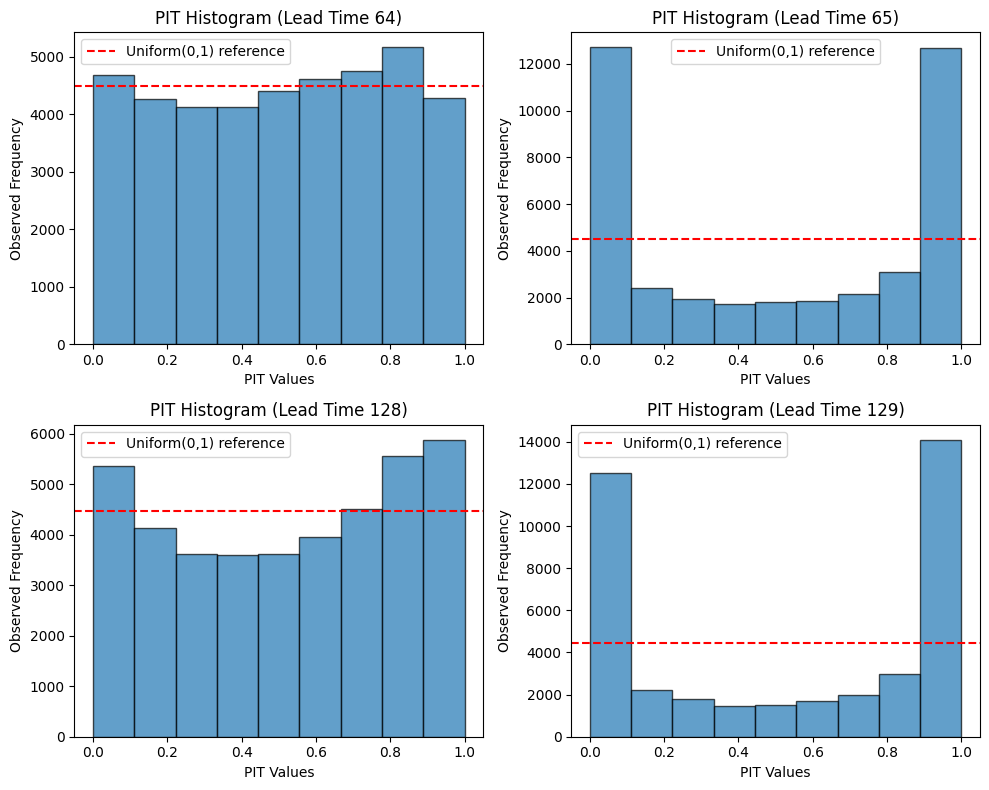

In [18]:
results["chronos-bolt-zero-shot_Chronos"].get_pit_histogram(overlay=False, lead_times=[64,65,128,129])

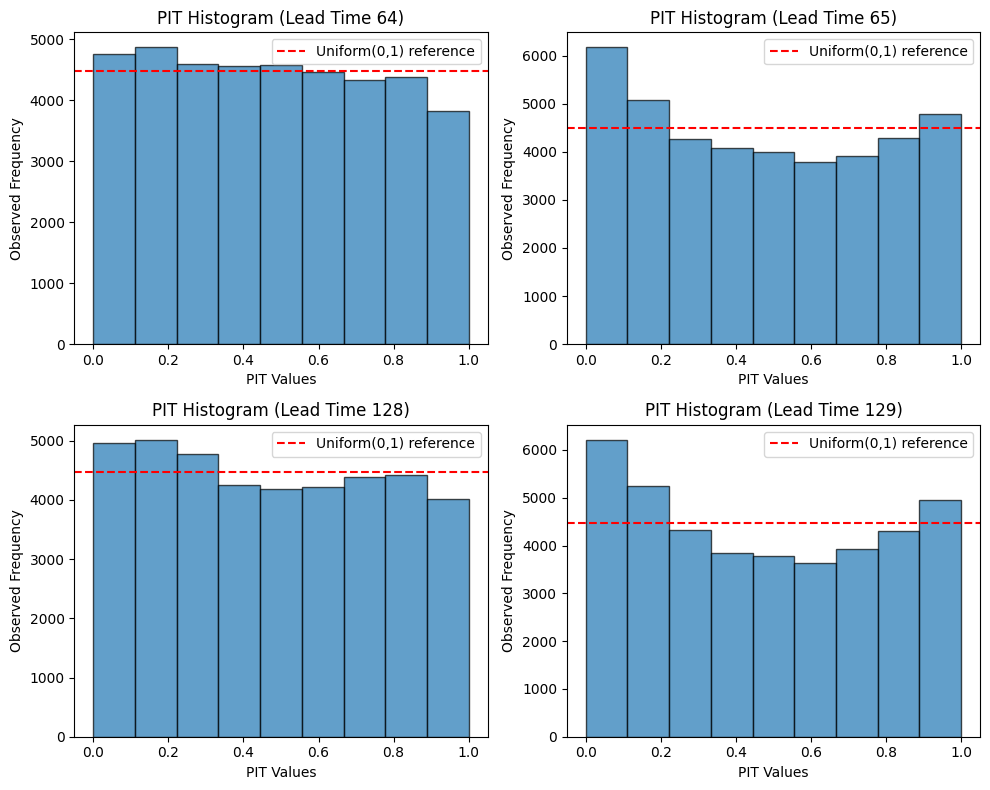

In [19]:
results["chronos-bolt-zero-shot_PostprocessorQR"].get_pit_histogram(overlay=False, lead_times=[64,65,128,129])

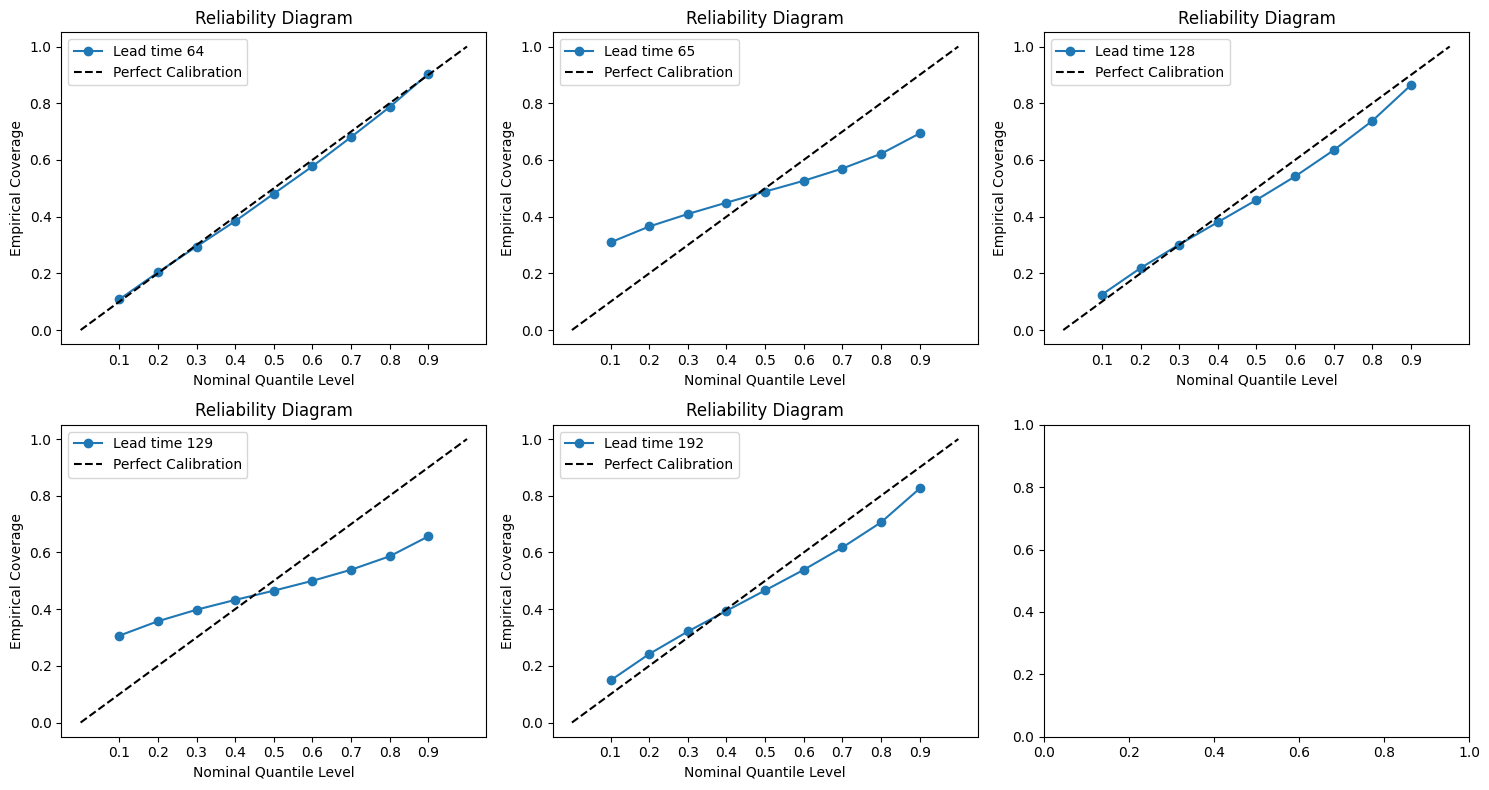

In [20]:
results["chronos-bolt-zero-shot_Chronos"].get_reliability_diagram(overlay=False, lead_times=[64,65,128,129,192])

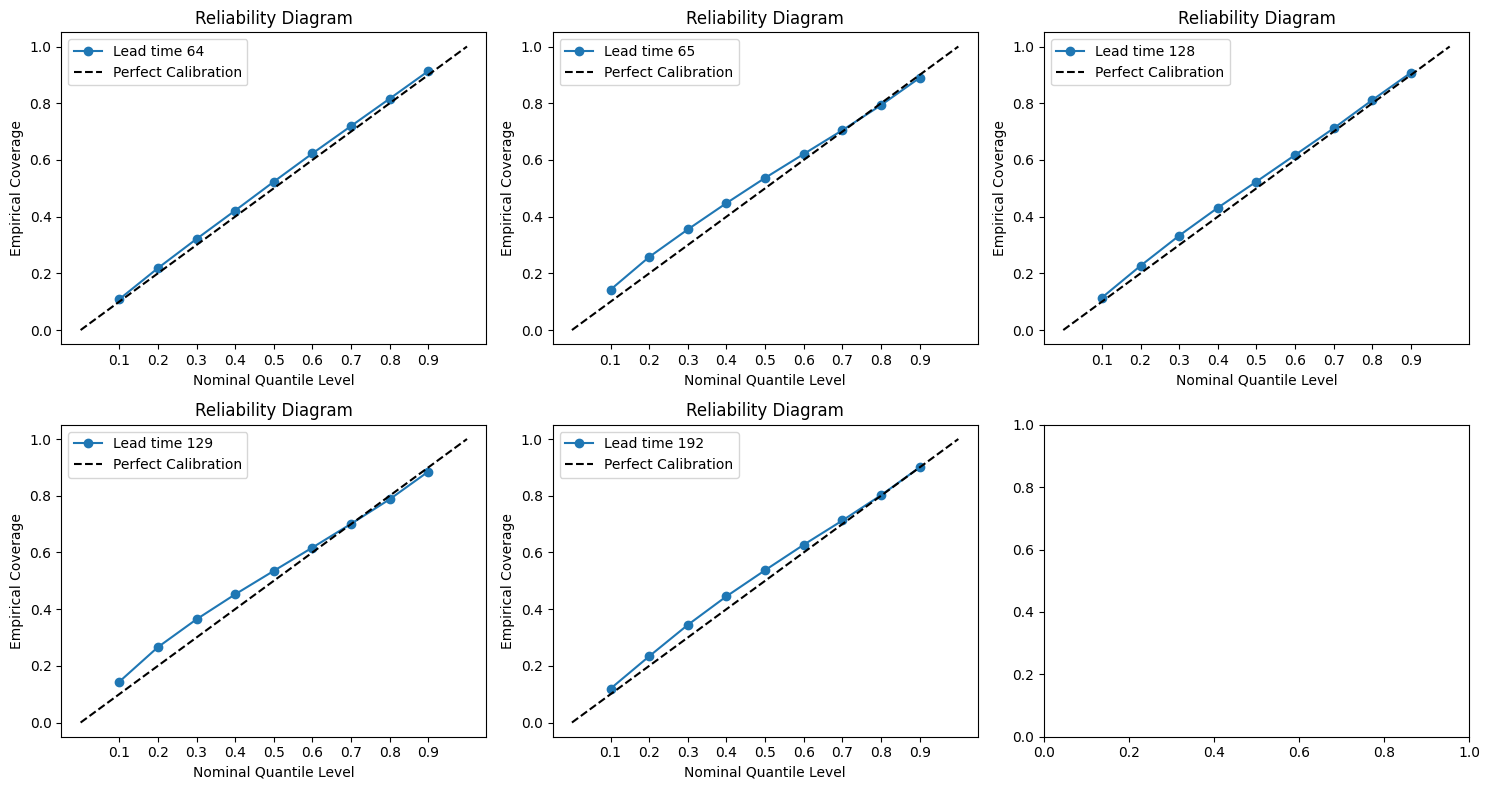

In [21]:
results["chronos-bolt-zero-shot_PostprocessorQR"].get_reliability_diagram(overlay=False, lead_times=[64,65,128,129,192])

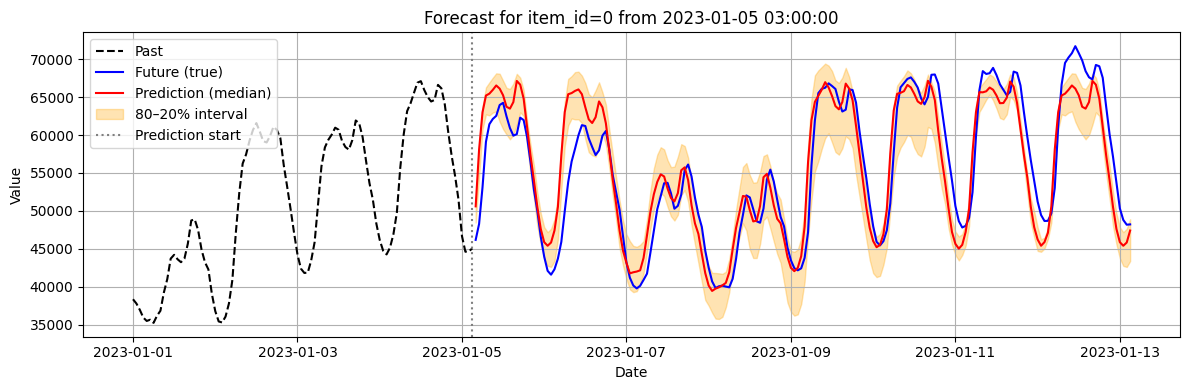

In [25]:
results["seasonal_rolling_RollingSeasonalQuantilePredictor"].item_ids[0].plot_forecasts(start=100)

# Evaluation Exchange Rates

In [26]:
results = load_predictions(prediction_dirs="./results/exchange_rates/pipeline/")

2025-05-22 12:21:42,936 - INFO - timeseries_evaluation.py - Loading predictions by searching in provided directories...
2025-05-22 12:21:42,941 - INFO - timeseries_evaluation.py - Common path identified: results/exchange_rates/pipeline
2025-05-22 12:21:43,012 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/exchange_rates/pipeline/chronos-bolt-zero-shot-sampling/backtest/Chronos/predictions.joblib` as key: chronos-bolt-zero-shot-sampling_Chronos
2025-05-22 12:21:43,083 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/exchange_rates/pipeline/seasonal_rolling/backtest/PostprocessorQR/predictions.joblib` as key: seasonal_rolling_PostprocessorQR
2025-05-22 12:21:43,151 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/exchange_rates/pipeline/seasonal_rolling/backtest/PostprocessorEQC/predictions.joblib` as key: seasonal_rolling_PostprocessorEQC
2025-05-22 12:21:43,222 - INFO - timeseries_evaluation.py - Loaded prediction file: `res

In [27]:
crps_results = get_crps_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

In [28]:
crps_results

,seasonal_rolling_PostprocessorQR,chronos-bolt-zero-shot-sampling_Chronos,naive_rolling_PostprocessorQR,chronos-bolt-zero-shot_PostprocessorQR,naive_rolling_RollingQuantilePredictor,chronos-bolt-zero-shot_PostprocessorEQC,chronos-bolt-finetuned-full_Chronos,chronos-bolt-finetuned-last-layer_Chronos,chronos-bolt-finetuned-lora_Chronos,seasonal_rolling_PostprocessorEQC,seasonal_rolling_RollingSeasonalQuantilePredictor,chronos-bolt-zero-shot_Chronos,naive_rolling_PostprocessorEQC,chronos-bolt-zero-shot_PostprocessorMLE,seasonal_rolling_PostprocessorMLE,naive_rolling_PostprocessorMLE,chronos-bolt-finetuned-full_PostprocessorEQC,chronos-bolt-finetuned-lora_PostprocessorEQC,chronos-bolt-finetuned-last-layer_PostprocessorEQC,chronos-bolt-finetuned-last-layer_PostprocessorQR,chronos-bolt-finetuned-lora_PostprocessorQR,chronos-bolt-finetuned-full_PostprocessorQR,chronos-bolt-finetuned-full_PostprocessorMLE,chronos-bolt-finetuned-lora_PostprocessorMLE,chronos-bolt-finetuned-last-layer_PostprocessorMLE
lead times,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.821513,1.000000,4.607289,1.158223,4.363878,1.008190,1.011756,1.178225,1.039938,3.556669,3.750560,1.0,4.280104,0.990464,3.571173,4.311868,1.075680,1.045137,1.235552,1.269752,1.091393,1.117934,1.065840,1.017339,1.066649
2,2.945477,1.000000,3.593086,1.154140,3.416165,1.008825,1.025097,1.129231,1.025109,2.740627,2.890642,1.0,3.344265,1.000062,2.752205,3.364326,1.075590,1.040791,1.162942,1.209042,1.101688,1.134348,1.083175,1.033716,1.061611
3,2.505665,1.000000,3.090124,1.144426,2.947998,1.006340,1.026018,1.102122,1.020813,2.331188,2.458897,1.0,2.882448,1.003934,2.341420,2.896461,1.072689,1.045177,1.130946,1.181695,1.107092,1.131643,1.082602,1.036941,1.058650
4,2.222557,1.000000,2.770641,1.135729,2.651392,1.003644,1.025062,1.083628,1.018849,2.067103,2.180940,1.0,2.589051,1.005172,2.075977,2.599173,1.060025,1.045264,1.107899,1.165306,1.107725,1.127679,1.083294,1.039729,1.051697
5,1.995331,1.000000,2.512044,1.131598,2.410821,1.002565,1.024256,1.068974,1.014844,1.855574,1.957929,1.0,2.351737,1.004394,1.864711,2.358609,1.061993,1.040322,1.093084,1.152434,1.108812,1.129382,1.081593,1.042443,1.046629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.857127,0.946825,0.905637,0.921887,0.946462,1.034935,0.894467,0.954989,0.944310,1.028504,0.957263,1.0,1.076393,1.182448,1.133615,1.182279,1.225171,1.290045,1.337952,1.611471,1.705323,1.919215,1.513356,2.035977,2.749657
190,0.851930,0.945226,0.903431,0.919530,0.943925,1.033484,0.892563,0.954541,0.945400,1.022136,0.951808,1.0,1.073476,1.225409,1.125945,1.176956,1.223770,1.283198,1.333470,1.623257,1.716603,1.927691,1.320544,1.766930,2.529707
191,0.869174,0.949246,0.904825,0.920023,0.945201,1.033001,0.895057,0.955999,0.948008,1.040902,0.972018,1.0,1.074759,1.199859,1.143150,1.173330,1.230987,1.289098,1.338630,1.631084,1.732783,1.948364,1.464743,2.016063,2.521165


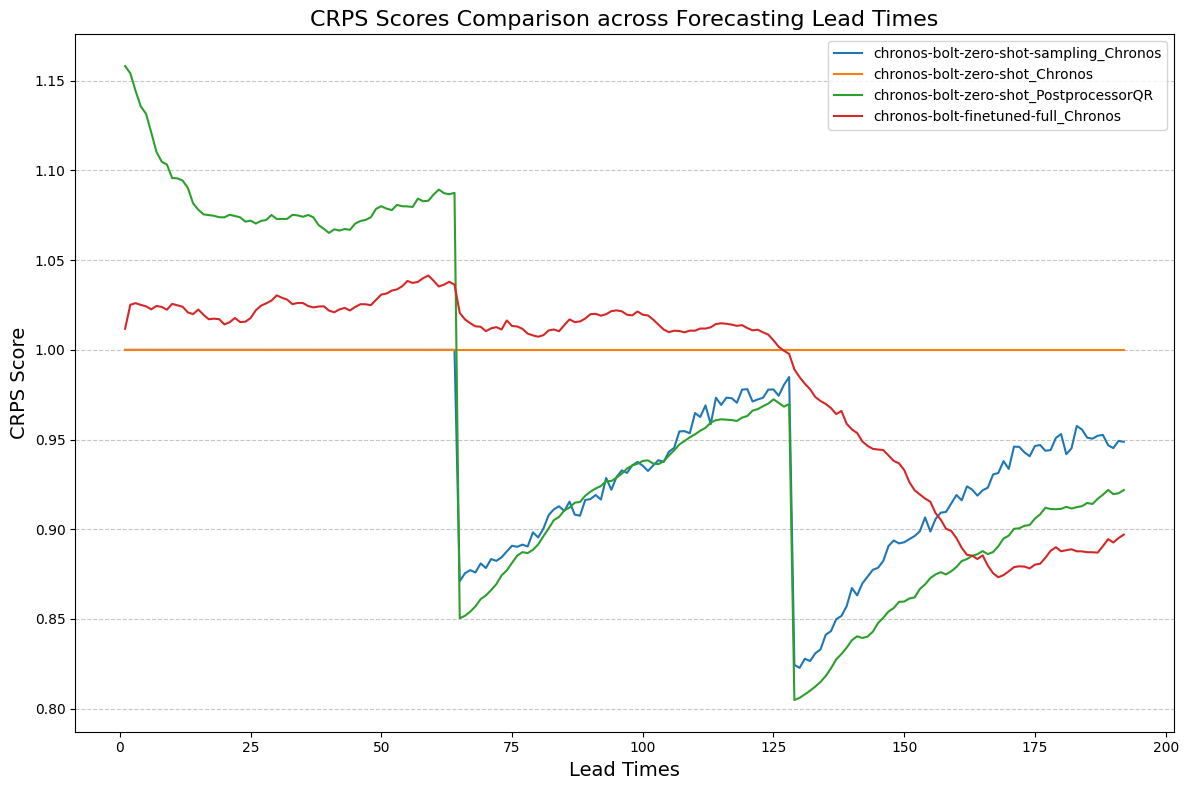

In [43]:
plot_crps_across_lead_times(results, 
                            selected_keys=["chronos-bolt-zero-shot_Chronos", 
                                            "chronos-bolt-zero-shot_PostprocessorQR",
                                            "chronos-bolt-zero-shot-sampling_Chronos", 
                                            "chronos-bolt-finetuned-full_Chronos",
                                            # "chronos-bolt-finetuned-full_PostprocessorQR", # selected last 3 years for calibration -> bad results
                                            # "naive_rolling_RollingQuantilePredictor"
                                            ],
                            reference_predictions="chronos-bolt-zero-shot_Chronos")

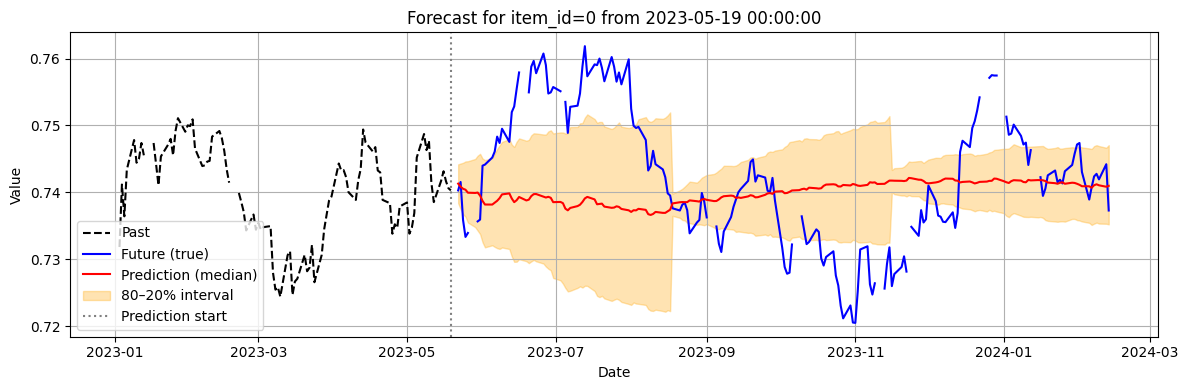

In [41]:
results["chronos-bolt-finetuned-full_Chronos"].item_ids[0].plot_forecasts(start=100)

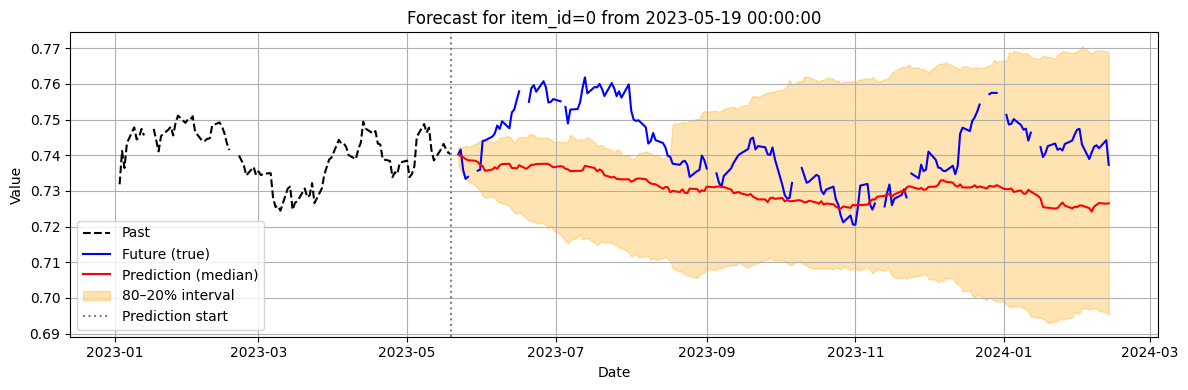

In [42]:
results["chronos-bolt-finetuned-full_PostprocessorEQC"].item_ids[0].plot_forecasts(start=100)

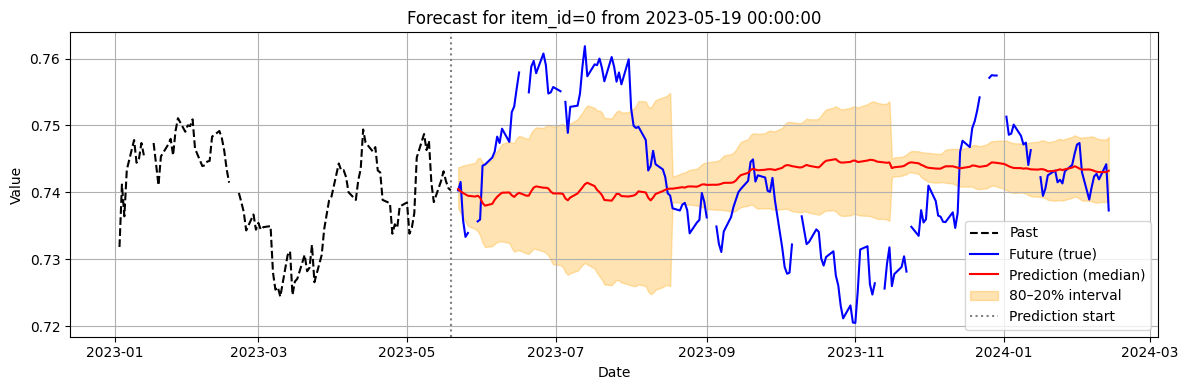

In [39]:
results["chronos-bolt-zero-shot_Chronos"].item_ids[0].plot_forecasts(start=100)

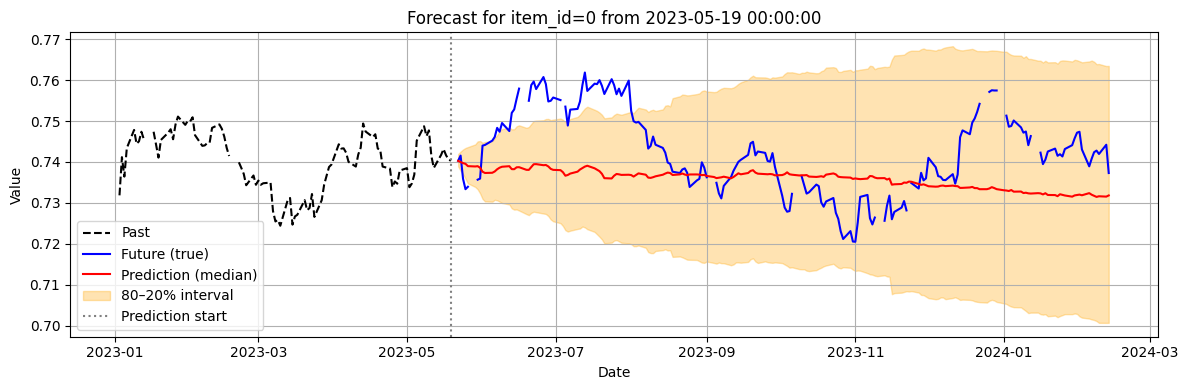

In [33]:
results["chronos-bolt-zero-shot_PostprocessorEQC"].item_ids[0].plot_forecasts(start=100)

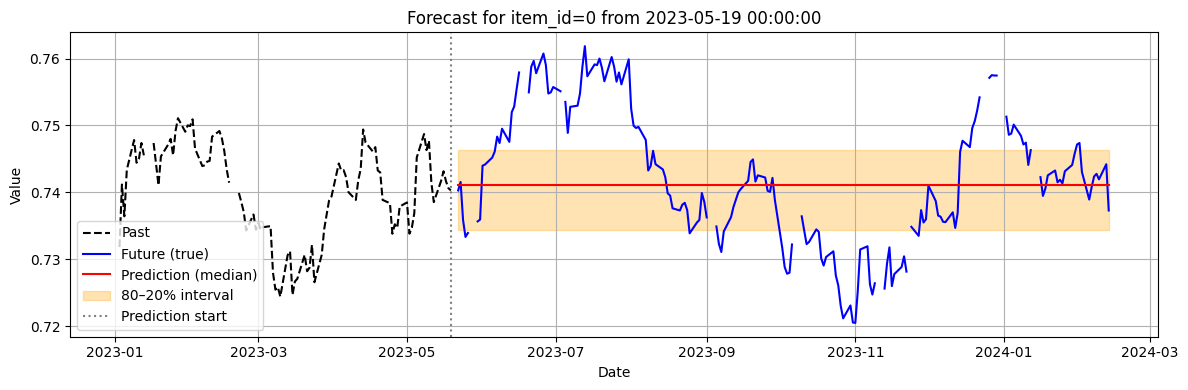

In [38]:
# limitation of seasonal rolling and rolling window. For energy consumption, this behaviour is desired. For exchange rates not (?)
results["naive_rolling_RollingQuantilePredictor"].item_ids[0].plot_forecasts(start=100)

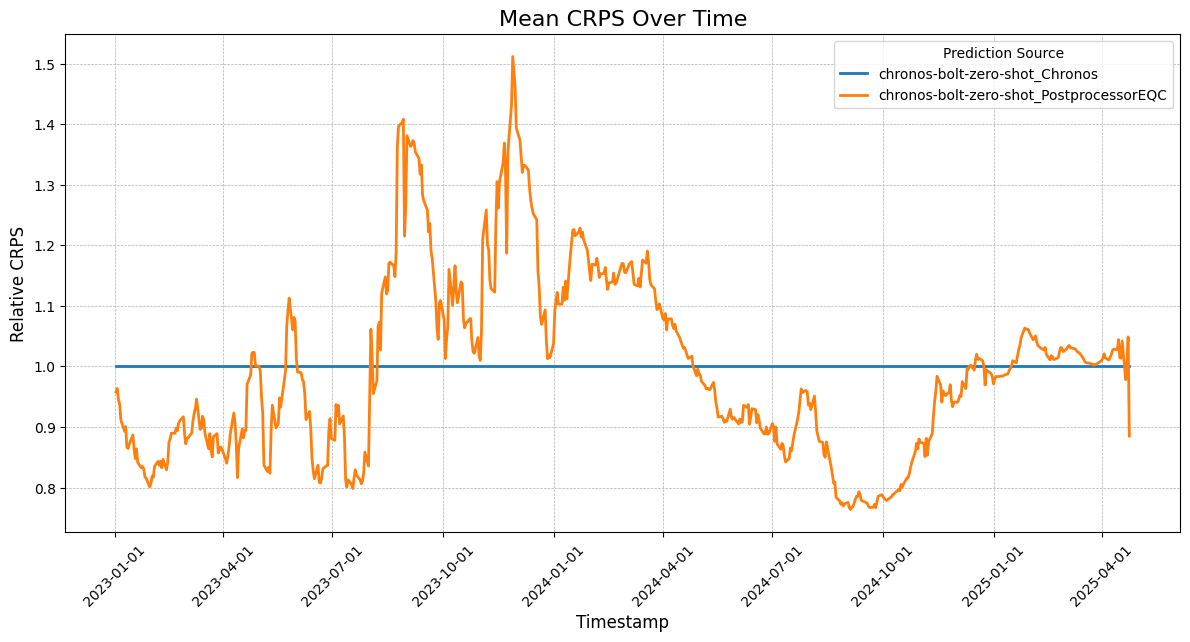

In [45]:
# update offset not only once on a calibration dataset but continously update it
plot_crps(predictions=results, selected_keys=["chronos-bolt-zero-shot_PostprocessorEQC", "chronos-bolt-zero-shot_Chronos"], reference_predictions="chronos-bolt-zero-shot_Chronos")

# Evaluation Wholesale Prices

In [46]:
results = load_predictions(prediction_dirs="./results/grosshandelspreise/pipeline/")

2025-05-22 12:37:47,460 - INFO - timeseries_evaluation.py - Loading predictions by searching in provided directories...
2025-05-22 12:37:47,596 - INFO - timeseries_evaluation.py - Common path identified: results/grosshandelspreise/pipeline
2025-05-22 12:37:50,061 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/grosshandelspreise/pipeline/chronos-bolt-zero-shot-sampling/backtest/Chronos/predictions.joblib` as key: chronos-bolt-zero-shot-sampling_Chronos
2025-05-22 12:37:52,461 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/grosshandelspreise/pipeline/chronos-bolt-zero-shot/backtest/Chronos/predictions.joblib` as key: chronos-bolt-zero-shot_Chronos
2025-05-22 12:37:56,434 - INFO - timeseries_evaluation.py - Loaded prediction file: `results/grosshandelspreise/pipeline/chronos-bolt-zero-shot/backtest/PostprocessorQR/predictions.joblib` as key: chronos-bolt-zero-shot_PostprocessorQR
2025-05-22 12:37:59,044 - INFO - timeseries_evaluation.py - Loaded

In [47]:
crps_results = get_crps_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

In [48]:
crps_results

,chronos-bolt-zero-shot_PostprocessorQR,chronos-bolt-finetuned-full_PostprocessorEQC,chronos-bolt-zero-shot_PostprocessorMLE,chronos-bolt-zero-shot_PostprocessorEQC,chronos-bolt-finetuned-full_PostprocessorMLE,chronos-bolt-zero-shot-sampling_Chronos,chronos-bolt-zero-shot_Chronos,chronos-bolt-finetuned-full_Chronos
lead times,,,,,,,,
1,0.987394,1.255380,0.997594,0.997713,1.292234,1.000000,1.0,1.298128
2,0.995440,1.081769,1.003716,0.999868,1.088703,1.000000,1.0,1.109280
3,0.996420,1.042690,1.002998,0.999507,1.033948,1.000000,1.0,1.065216
4,0.996053,1.028299,1.001342,0.999034,1.029552,1.000000,1.0,1.051701
5,0.996371,1.010231,1.000850,0.998383,1.015331,1.000000,1.0,1.028575
...,...,...,...,...,...,...,...,...
189,0.971889,0.967400,0.976025,0.975206,1.004932,1.002032,1.0,0.995623
190,0.973010,0.973089,0.978378,0.975715,1.010242,1.003427,1.0,0.999764
191,0.973196,0.973173,0.979562,0.975864,1.007920,1.002732,1.0,0.999787


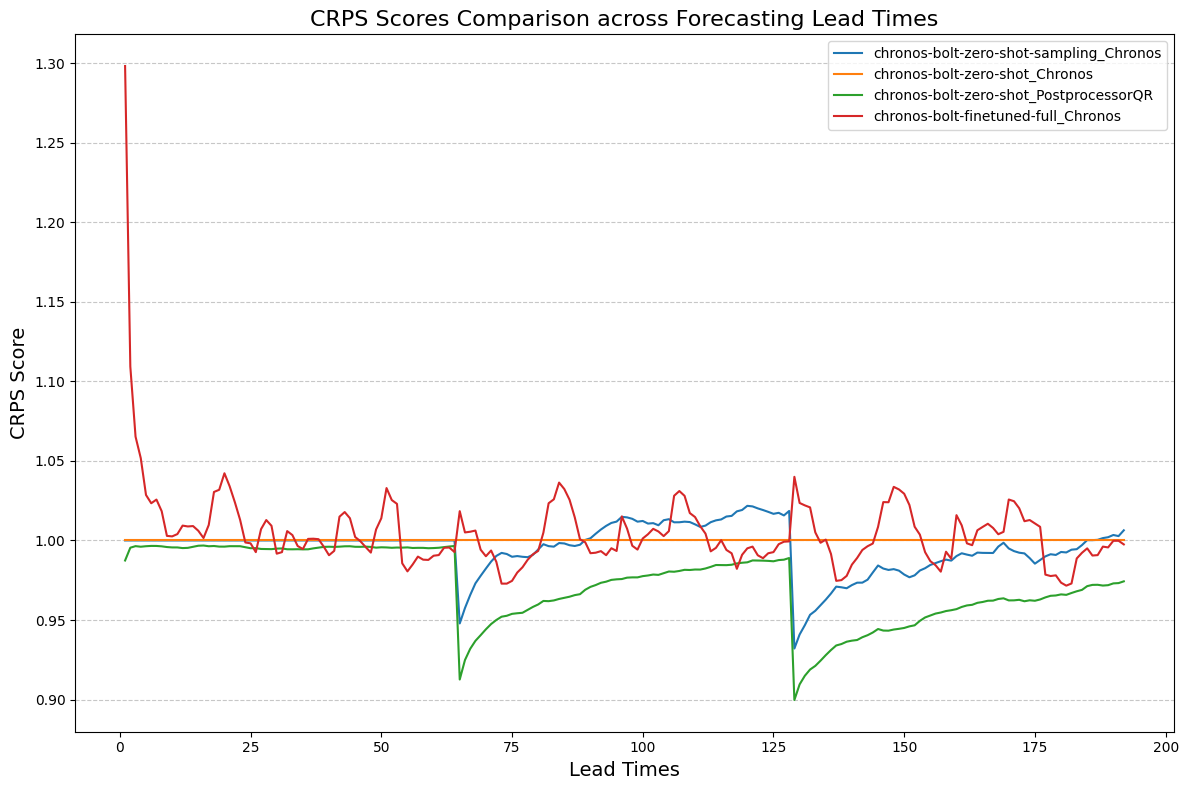

In [55]:
plot_crps_across_lead_times(results, 
                            selected_keys=["chronos-bolt-zero-shot_Chronos", 
                                            "chronos-bolt-zero-shot_PostprocessorQR",
                                            "chronos-bolt-zero-shot-sampling_Chronos", 
                                            "chronos-bolt-finetuned-full_Chronos",
                                            # "chronos-bolt-finetuned-full_PostprocessorQR", # selected last 3 years for calibration -> bad results
                                            # "naive_rolling_RollingQuantilePredictor"
                                            ],
                            reference_predictions="chronos-bolt-zero-shot_Chronos")

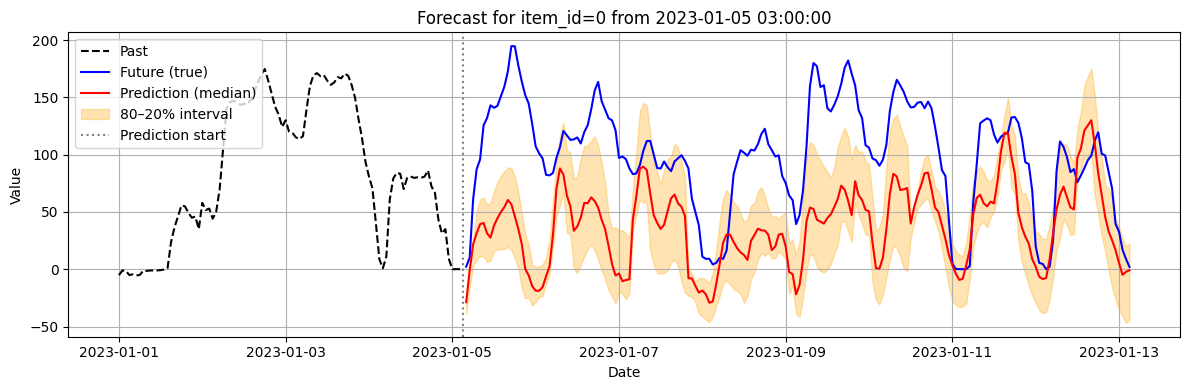

In [49]:
results["chronos-bolt-finetuned-full_Chronos"].item_ids[0].plot_forecasts(start=100)

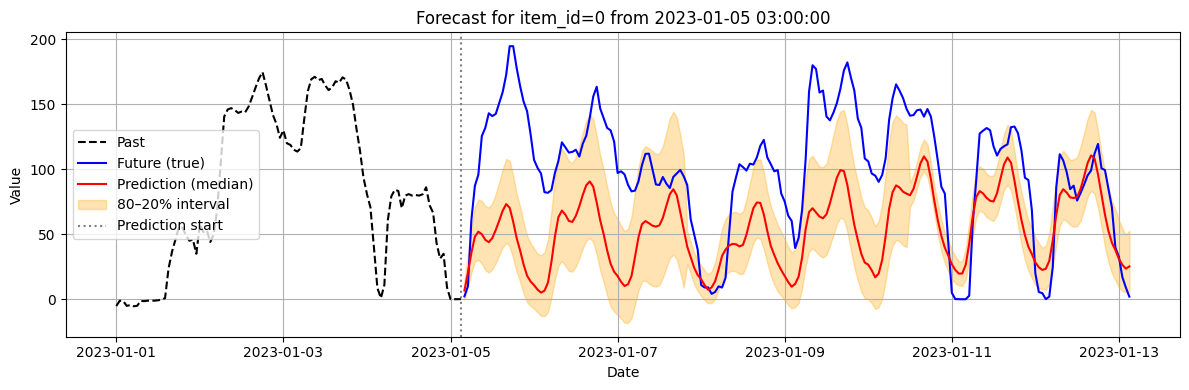

In [51]:
results["chronos-bolt-zero-shot_Chronos"].item_ids[0].plot_forecasts(start=100)

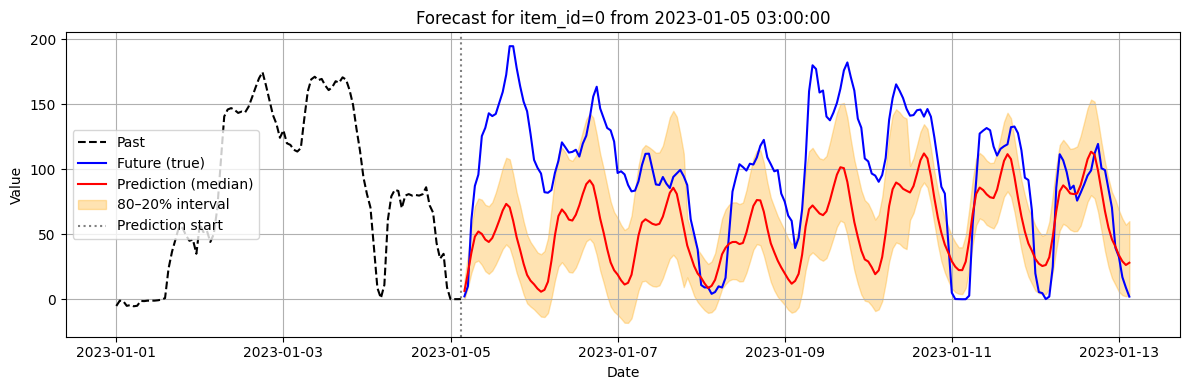

In [56]:
results["chronos-bolt-zero-shot_PostprocessorEQC"].item_ids[0].plot_forecasts(start=100)

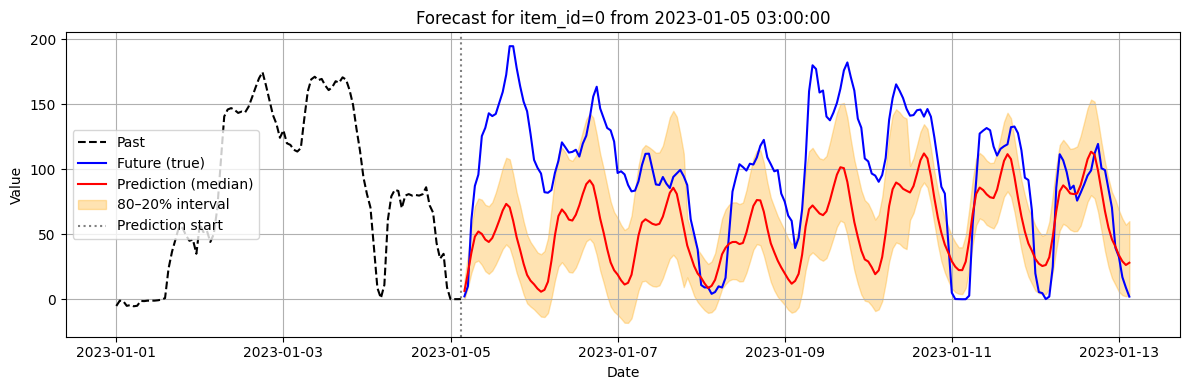

In [53]:
results["chronos-bolt-zero-shot_PostprocessorEQC"].item_ids[0].plot_forecasts(start=100)

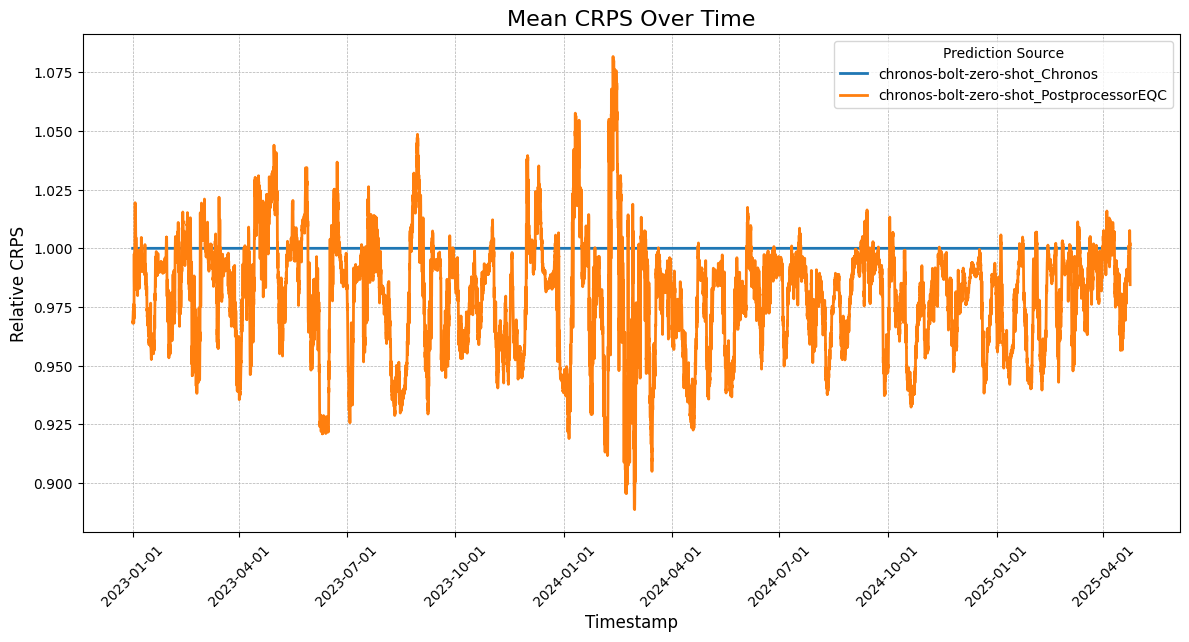

In [54]:
# update offset not only once on a calibration dataset but continously update it
plot_crps(predictions=results, selected_keys=["chronos-bolt-zero-shot_PostprocessorEQC", "chronos-bolt-zero-shot_Chronos"], reference_predictions="chronos-bolt-zero-shot_Chronos")